### Packages loading

In [1]:
import sys
sys.path.insert(0, '..')
import qtm.hamiltonians
import matplotlib.pyplot as plt
from qtm.evolution import environment, mutate, selection, crossover
import qtm.constant
import qtm.ansatz
import qtm.qcompilation
import qtm.state
import qtm.evolution
import qiskit
import numpy as np
from qiskit.quantum_info import SparsePauliOp
%load_ext autoreload
%autoreload 2


In [2]:
t = 1.0
h_opt = qtm.hamiltonians.XYZ_model(N=4,J=0.5,u=0,h=[0,0,0,0])
qc_time = qtm.state.time_dependent_qc_inverse(4,h_opt, t)

def compilation_hamiltonian_fitness(qc: qiskit.QuantumCircuit, num_steps=100):
    global compiler
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qc_time,
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)


def compilation_threshold(fitness_value):
    if fitness_value < 0.1:
        return True
    return False


Main algorithm, includes: init population, selection, crossover, mutate.

In [63]:
params = {'depth': 4,
          'num_circuit': 8,  # Must mod 8 = 0
          'num_generation': 4,
          'num_qubits': qc_time.num_qubits,
          'threshold': compilation_threshold,
          'prob_mutate': 0.1}

env = environment.EEnvironment(
    params,
    fitness_func=compilation_hamiltonian_fitness,
    selection_func=selection.elitist_selection,
    crossover_func=crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool=qtm.constant.operations,
    file_name=''
)

env.evol()


Step:   0%|                                                                                                                 | 0/4 [00:00<?, ?it/s]

Initialize population ...


Step:   0%|                                                                                                                 | 0/4 [14:30<?, ?it/s]


Start evol progress ...
Evol at generation 0
Fitness 0.6633264563607453, Strengh 2.519473580641497
0.75
Fitness 0.7181607648818955, Strengh 1.5608921512984173
0.5



Step:  25%|█████████████████████████▊                                                                             | 1/4 [17:04<51:13, 1024.55s/it]

Evol at generation 1
Fitness 0.6418392290031503, Strengh 2.3407409583881558
0.5
Fitness 0.6633264563607453, Strengh 1.8036621562918849
0.5



Step:  50%|████████████████████████████████████████████████████                                                    | 2/4 [20:11<17:43, 531.62s/it]

Evol at generation 2
Fitness 0.6418392290031503, Strengh 1.9719885005545676
0.5
Fitness 0.6611210895209851, Strengh 1.6472698034993896
0.5



Step:  75%|██████████████████████████████████████████████████████████████████████████████                          | 3/4 [23:09<06:10, 370.39s/it]

Evol at generation 3
Fitness 0.6418392290031503, Strengh 2.186918480389222
0.5
Fitness 0.6611210895209851, Strengh 1.3824900513047478
0.25



Step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [26:22<00:00, 395.70s/it]

End evol progress, best score ever: 0.6607494593218661


In [64]:
print(env.best_score_progress)
print(env.current_generation)

[0.6418392290031503, 0.6430960543855809, 0.6617719066924022, 0.6607494593218661]
4


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

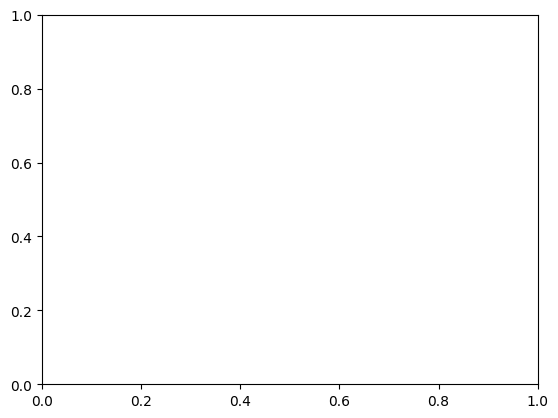

In [65]:
average_fitness = []
for generation in env.populations:
    fitnesss = []
    for circuit in generation:
        fitnesss.append(circuit.fitness)
        average_fitness.append(np.mean(fitnesss))
        plt.plot(list(range(1, env.current_generation + 1)), average_fitness, label = 'best_fitness')

In [66]:
env2 = environment.EEnvironment('ga_2qubits_compilation_hamiltonian_fitness_2023-11-07.envobj')

Test best candidate again

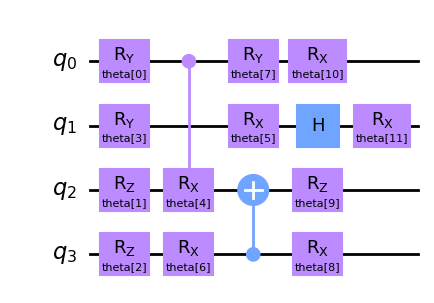

In [67]:
env.best_candidate.qc.draw('mpl')

[array([0.55191408])]


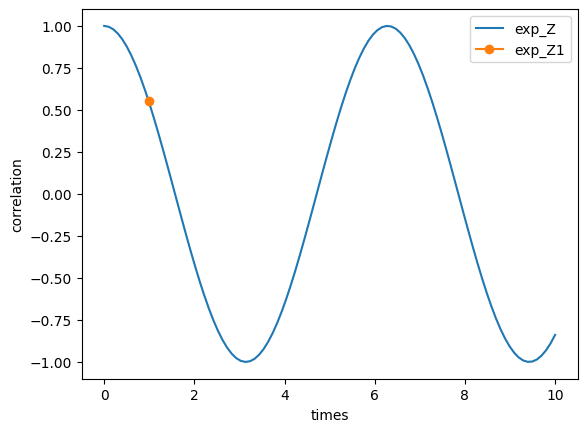

In [ ]:
# test correlation
from qiskit.quantum_info import SparsePauliOp

#intial setup
num_qubits = 4
t1 = 1.0
op_Z = qtm.hamiltonians.pauli_oper(num_qubits,oper = 'Z')
cor_theo = []
cor_ga = []

# for GA
qc_ga = compiler.u
parameters_ga = compiler.thetass[-1]
exp_ga = qtm.utilities.get_expectation(qc_ga,op_Z,parameters_ga)  
cor_ga.append(exp_ga)

# for theory
times = np.linspace(0,10,100)
for t in times:
    qc_theo = qtm.state.time_dependent_qc(4,h_opt,t)
    exp_theo = qtm.utilities.get_expectation(qc_theo,op_Z,None)   
    cor_theo.append(exp_thep)
    
#plot
import matplotlib.pyplot as plt
plt.plot(times,cor_theo,label='theory')
plt.plot(t1,cor_ga,label='GA',marker='o')

plt.xlabel('times')
plt.ylabel('correlation')
plt.legend()
plt.savefig('cor_time.png')

In [ ]:
plt.plot(compiler.loss_values)